<a href="https://colab.research.google.com/github/nishia1/jersey-justice/blob/main/njcounties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
gdf = gpd.read_file("/content/drive/MyDrive/njdata/County_Boundaries_of_NJ.geojson")
gdf.head()

,OBJECTID,COUNTY,COUNTY_LABEL,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,...,POPDEN2000,POPDEN1990,POPDEN1980,REGION,GLOBALID,Shape_Length,Shape_Area,POP2020,POPDEN2020,geometry
0,1,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390813.840968,610.646627,...,414,451,335,COASTAL,{9BB3C36A-5C8E-44F2-85B8-AAA00F4E7F59},650228.153900,1.702385e+10,274534,450,"POLYGON ((-74.67437 39.68858, -74.67441 39.688..."
1,2,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153489.661221,239.827596,...,3686,3459,3544,NORTHEASTERN,{1287F6F9-8291-47AD-92B6-E1753A15B262},443326.121955,6.686010e+09,955732,3985,"POLYGON ((-73.90569 40.98315, -73.90567 40.983..."
2,3,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,524901.239973,820.158187,...,516,482,442,SOUTHERN,{BAE26D96-91E5-4C3A-BBBD-B3E11C6859EC},788705.269521,2.286470e+10,461860,563,"POLYGON ((-74.69864 40.18226, -74.69891 40.182..."
3,4,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145597.905686,227.496728,...,2237,2341,2073,SOUTHERN,{259165A1-FA2E-44C0-AFBA-3F959684CC70},494949.424410,6.342245e+09,523485,2301,"POLYGON ((-75.03314 39.99483, -75.03334 39.995..."
4,5,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183125.841721,286.134128,...,358,332,288,COASTAL,{E8631719-0401-4648-A4D3-3A7C6337985D},514564.858765,7.976962e+09,95263,333,"POLYGON ((-74.85962 39.31897, -74.85986 39.319..."


<Axes: >

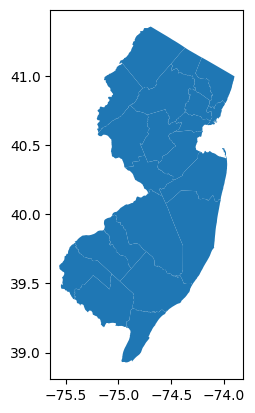

In [ ]:
gdf.plot()

<Axes: >

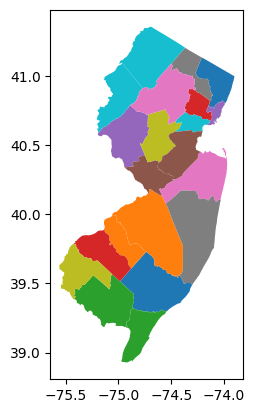

In [ ]:
gdf.plot("COUNTY")

<Axes: >

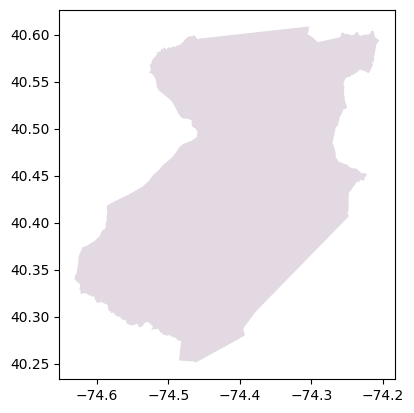

In [ ]:
gdf[gdf["COUNTY"] == "MIDDLESEX"].plot(cmap="twilight")

In [ ]:
povertyData = pd.read_excel("/content/drive/MyDrive/njdata/foodinsecuritydata2019_2021.xlsx", sheet_name='County', skiprows=[7])
#print(povertyData)
#povertyData = povertyData.drop(povertyData[0:40])
index_names = povertyData[ povertyData['State'] != 'NJ'].index
#povertyData.drop(povertyData.index[0:1777], inplace=True)
povertyData.drop(index_names, inplace=True)
povertyData = povertyData[povertyData["Year"] == 2021]
#print(povertyData)#povertyData.drop(povertyData.index[1798:9426], inplace=True)
#print(povertyData)
#povertyData["COUNTY"] = povertyData["County, State"].str[0:len(povertyData["County, State"].str)-12].upper()
povertyData[['county', 'state']] = povertyData["County, State"].str.split(",", expand = True)
povertyData[['newCounty', 'word']] = povertyData["county"].str.split(" C", expand=True)
povertyData['newCounty'] = povertyData['newCounty'].str.upper()
povertyData = povertyData.drop(['county', 'state', 'word', 'County, State'], axis=1)
#povertyData['color'] = np.where(povertyData['# of Food Insecure Persons Overall']>10000, "red", 'green')
# determining the avg num budget shortfall
totalShortfall=count=0
for ind in povertyData.index:
  totalShortfall+=povertyData['Weighted Annual Food Budget Shortfall'][ind]
  count+=1
totalShortfall/=count
#print(totalShortfall)
# total number of food insecure people
colorData = povertyData
colorData['color'] = ""
for ind in colorData.index:
  #print(type(ind), colorData.index)
  if(colorData['# of Food Insecure Persons Overall'][ind]>10000):
    colorData['color'][ind]="red"
  else:
    colorData['color'][ind]="green"
#colorData = povertyData.where(povertyData['# of Food Insecure Persons Overall']>10000)
#colorData['color']= "red"
colorData = gdf.merge(colorData, left_on = "COUNTY", right_on = "newCounty")
#print(colorData)

# total shortfall
newData = povertyData
newData['color'] = ""
for ind in newData.index:
  #print(newData['Weighted Annual Food Budget Shortfall'][ind], type(newData['Weighted Annual Food Budget Shortfall'][ind]), totalShortfall)
  if(newData['Weighted Annual Food Budget Shortfall'][ind] > totalShortfall):
    newData['color'][ind]="red"
  else:
    newData['color'][ind]="green"
#newData = newData.drop(index=[row for row in newData.index if 'NaN' in newData.loc[row].values])
newData = gdf.merge(newData, left_on = "COUNTY", right_on = "newCounty")
print(newData)
#print(povertyData)
#training_data = povertyData.merge(burlingtonWaterData, left_on = "newCounty", right_on = "County")
#training_data = povertyData.merge(gdf, left_on = "newCounty", right_on = "COUNTY")
#print(training_data)

    OBJECTID      COUNTY       COUNTY_LABEL   CO             GNIS_NAME  \
0          1    ATLANTIC    Atlantic County  ATL    County of Atlantic   
1          2      BERGEN      Bergen County  BER      County of Bergen   
2          3  BURLINGTON  Burlington County  BUR  County of Burlington   
3          4      CAMDEN      Camden County  CAM      County of Camden   
4          5    CAPE MAY    Cape May County  CAP    County of Cape May   
5          6  CUMBERLAND  Cumberland County  CUM  County of Cumberland   
6          7       ESSEX       Essex County  ESS       County of Essex   
7          8  GLOUCESTER  Gloucester County  GLO  County of Gloucester   
8          9      HUDSON      Hudson County  HUD      County of Hudson   
9         10   HUNTERDON   Hunterdon County  HUN   County of Hunterdon   
10        11      MERCER      Mercer County  MER      County of Mercer   
11        12    MONMOUTH    Monmouth County  MON    County of Monmouth   
12        13       OCEAN       Ocean C

<ipython-input-10-0f57d52b0155>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colorData['color'][ind]="red"
<ipython-input-10-0f57d52b0155>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colorData['color'][ind]="green"
<ipython-input-10-0f57d52b0155>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['color'][ind]="green"
<ipython-input-10-0f57d52b0155>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [ ]:
def plot_overlay(overlay_type, overlay_result):
    '''Plot the overlay result on a map and add the outlines of the original shapefiles on top.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    # Plot overlay data
    overlay_result.plot(ax = ax, cmap = 'twilight', edgecolor = 'black')

    # Plot outlines of original shapefiles
    newData.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
    colorData.plot(ax = ax, color = 'none', edgecolor = 'dodgerblue')

    # Stylize plots
    #plt.style.use('bmh')

    # Set title
    ax.set_title('Areas in NJ at High Environmental Risk\n{}'.format(overlay_type), fontdict = {'fontsize': '15', 'fontweight' : '3'})

<Axes: >

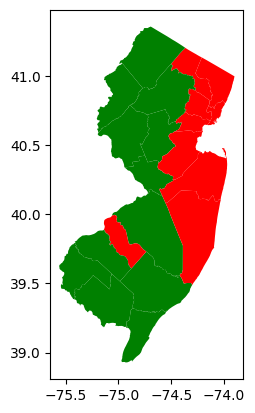

In [ ]:
#fig, ax = plt.subplots(1, 1, figsize = (10, 10))
gdf.plot(color=newData['color'])
#ax.set_title("Number of Food Insecure People")

<Axes: >

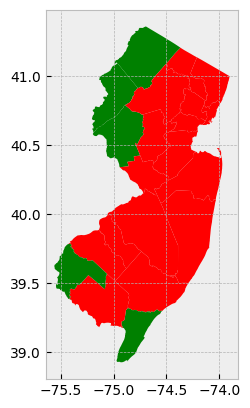

In [ ]:
gdf.plot(color=colorData['color'])

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1803: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
<ipython-input-16-7d02e7f12711>:2: UserWarning: `keep_geom_type=True` in overlay resulted in 186 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  res_union = gpd.overlay(colorData, newData, how = 'union')


    OBJECTID_1    COUNTY_1     COUNTY_LABEL_1 CO_1           GNIS_NAME_1  \
0          1.0    ATLANTIC    Atlantic County  ATL    County of Atlantic   
1         13.0       OCEAN       Ocean County  OCE       County of Ocean   
2          3.0  BURLINGTON  Burlington County  BUR  County of Burlington   
3          4.0      CAMDEN      Camden County  CAM      County of Camden   
4          3.0  BURLINGTON  Burlington County  BUR  County of Burlington   
5          4.0      CAMDEN      Camden County  CAM      County of Camden   
6          5.0    CAPE MAY    Cape May County  CAP    County of Cape May   
7          6.0  CUMBERLAND  Cumberland County  CUM  County of Cumberland   
8          8.0  GLOUCESTER  Gloucester County  GLO  County of Gloucester   
9         15.0       SALEM       Salem County  SAL       County of Salem   
10         1.0    ATLANTIC    Atlantic County  ATL    County of Atlantic   
11        13.0       OCEAN       Ocean County  OCE       County of Ocean   
12         2

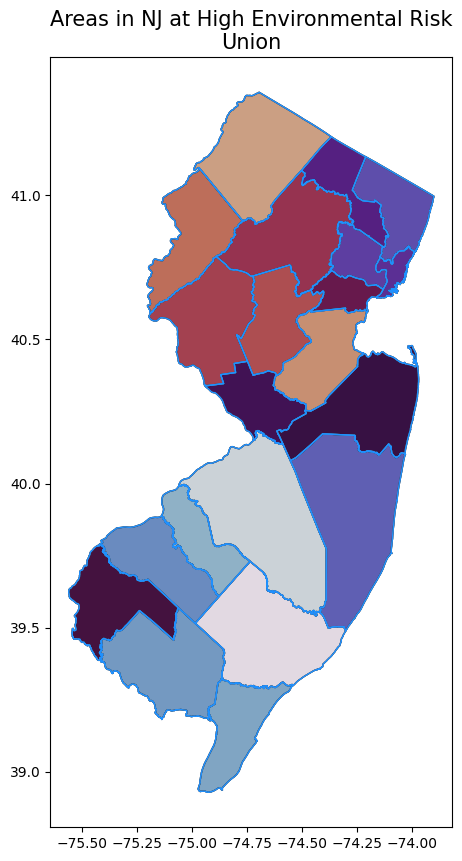

In [ ]:
#res_union = colorData.overlay(newData, how='union')
res_union = gpd.overlay(colorData, newData, how = 'union')
# colorData.union(newData)
print(res_union)
#gdf.plot(color = res_union["color"])
plot_overlay(overlay_type = "Union", overlay_result = res_union)